In [148]:
import xarray as xr 
import numpy as np
from dask.distributed import Client
from dask_jobqueue import SLURMCluster
import pandas as pd
import dask.array as da
import glob 
import os

In [149]:


cluster = SLURMCluster(
    job_name="climt1",          # --job-name
    cores=16,                     # Number of cores per task (adjust if needed)
    processes=16,                 # One process per task
    memory="100GB",               # --mem
    walltime="01:00:00",         # --time
    queue="med",               # --partition
    log_directory=".",           # Logs will be saved to the current directory
)



/home1/nalex2023/.conda/envs/nma/lib/python3.13/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46445 instead
  warnings.warn(


In [150]:

cluster.scale(4)

client = Client(cluster)

In [151]:
client

Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: http://10.42.239.61:46445/status,
Dashboard: http://10.42.239.61:46445/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.42.239.61:38451,Workers: 0
Dashboard: http://10.42.239.61:46445/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [152]:
era_dsets = '/home1/nalex2023/Datasets/era5_manus/'

era_files = glob.glob(era_dsets + '*.nc')

era_test = xr.open_dataset(era_files[0],chunks='auto').sel(pressure_level=1000).roll(valid_time=10)



In [153]:
era_test

<xarray.Dataset> Size: 856MB
Dimensions:         (valid_time: 744, latitude: 41, longitude: 1169)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 6kB 2003-10-01 ... 2003-10-31...
    pressure_level  float64 8B 1e+03
  * latitude        (latitude) float64 328B 5.0 4.75 4.5 ... -4.5 -4.75 -5.0
  * longitude       (longitude) float64 9kB -141.0 -140.8 -140.5 ... 150.8 151.0
    expver          (valid_time) <U4 12kB dask.array<chunksize=(744,), meta=np.ndarray>
Data variables:
    z               (valid_time, latitude, longitude) float32 143MB dask.array<chunksize=(248, 11, 390), meta=np.ndarray>
    q               (valid_time, latitude, longitude) float32 143MB dask.array<chunksize=(248, 11, 390), meta=np.ndarray>
    t               (valid_time, latitude, longitude) float32 143MB dask.array<chunksize=(248, 11, 390), meta=np.ndarray>
    u               (valid_time, latitude, longitude) float32 143MB dask.array<chunksize=(248, 11, 390), meta=np.ndarray>
    v               (valid_time, latitude, longitude) float32 143MB dask.array<chunksize=(248, 11, 390), meta=np.ndarray>
    w               (valid_time, latitude, longitude) float32 143MB dask.array<chunksize=(248, 11, 390), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-25T13:12 GRIB to CDM+CF via cfgrib-0.9.1...

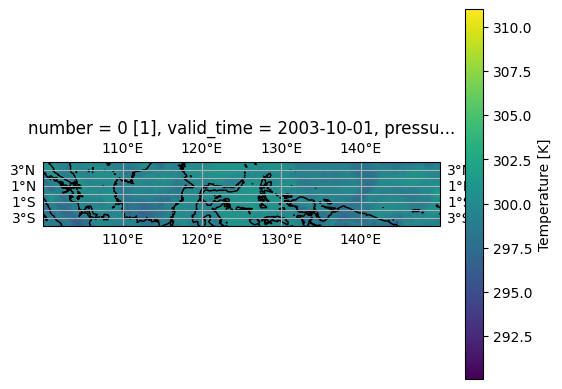

In [154]:
fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()})
era_test.isel(valid_time=0).t.plot(ax=ax)
ax.coastlines()
#ax.set_extent([-180,180,-90,90])
# maritime boundaries
ax.set_extent([100,150,-4,4])

grid = ax.gridlines(draw_labels=True)

In [176]:
import pandas as pd


era_test['new_time'] = pd.to_datetime(era_test['valid_time'])

era_test['lat_wise_diff'] = era_test['longitude']/15



era_test_new = era_test.copy()


era_test_new['new_time'] = era_test['valid_time'] + xr.DataArray(pd.to_timedelta(era_test['lat_wise_diff'], unit='h'), dims=era_test['lat_wise_diff'].dims)



In [171]:
era_test_var

<xarray.DataArray 't' (valid_time: 744, latitude: 41, longitude: 1169)> Size: 143MB
array([[[298.3037 , 298.3662 , 298.43652, ..., 298.167  , 298.12012,
         298.31738],
        [298.20215, 298.2881 , 298.37598, ..., 298.06738, 297.92285,
         298.13574],
        [298.12012, 298.20215, 298.28027, ..., 298.1416 , 298.00293,
         298.15332],
        ...,
        [298.0205 , 297.99707, 297.98145, ..., 300.56152, 300.55176,
         300.48145],
        [298.04785, 298.03613, 298.0127 , ..., 300.78418, 300.9873 ,
         300.95215],
        [298.16895, 298.12012, 298.09082, ..., 300.4834 , 300.75293,
         300.84473]],

       [[298.33813, 298.4065 , 298.45923, ..., 298.42212, 298.48462,
         298.58228],
        [298.22876, 298.30493, 298.3733 , ..., 298.13696, 298.22485,
         298.51978],
        [298.10767, 298.1897 , 298.25806, ..., 298.2444 , 298.45728,
         298.65845],
...
        [298.23413, 298.16968, 298.1189 , ..., 300.55835, 300.64624,
         300.47046],
        [298.2693 , 298.21265, 298.17358, ..., 300.71655, 300.99585,
         300.94897],
        [298.36304, 298.30835, 298.28687, ..., 300.45093, 300.66772,
         300.86694]],

       [[298.31274, 298.35767, 298.42798, ..., 298.14282, 297.99634,
         298.19946],
        [298.21118, 298.2815 , 298.3811 , ..., 297.81274, 297.66235,
         297.79712],
        [298.14282, 298.2229 , 298.30884, ..., 298.0276 , 297.81665,
         297.69165],
        ...,
        [298.09204, 298.05493, 298.0315 , ..., 300.54126, 300.5393 ,
         300.3694 ],
        [298.13306, 298.09204, 298.06665, ..., 300.78735, 300.9729 ,
         300.88892],
        [298.24634, 298.1897 , 298.18384, ..., 300.50806, 300.74243,
         300.87524]]], shape=(744, 41, 1169), dtype=float32)
Coordinates:
    number          int64 8B 0
  * valid_time      (valid_time) datetime64[ns] 6kB 2003-10-01 ... 2003-10-31...
    pressure_level  float64 8B 1e+03
  * latitude        (latitude) float64 328B 5.0 4.75 4.5 ... -4.5 -4.75 -5.0
  * longitude       (longitude) timedelta64[ns] 9kB -1 days +14:36:00 ... 10:...
    expver          (valid_time) <U4 12kB '0001' '0001' '0001' ... '0001' '0001'
    new_time        (valid_time, longitude) datetime64[ns] 7MB 2003-09-30T14:...
Attributes: (12/31)
    GRIB_paramId:                             130
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      47929
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           t
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [173]:

era_test_var = era_test_new['t'].compute()  


lon_wise_ds = []
for ii in era_test_var.longitude.values:
    new_time_vals = era_test_var['new_time'].sel(longitude=ii)
    # create a new dataset with the new time values
    lon_wise_ds += [era_test_var.sel(longitude=ii).assign_coords(valid_time=new_time_vals)]
    print(ii)
lon_wise_ds = xr.concat(lon_wise_ds, dim=era_test_var.longitude)


-33840000000000 nanoseconds
-33779999999998 nanoseconds
-33720000000001 nanoseconds
-33660000000000 nanoseconds
-33599999999998 nanoseconds
-33540000000001 nanoseconds
-33480000000000 nanoseconds
-33419999999998 nanoseconds
-33360000000001 nanoseconds
-33300000000000 nanoseconds
-33239999999998 nanoseconds
-33180000000001 nanoseconds
-33120000000000 nanoseconds
-33059999999998 nanoseconds
-33000000000001 nanoseconds
-32940000000000 nanoseconds
-32879999999998 nanoseconds
-32820000000001 nanoseconds
-32760000000000 nanoseconds
-32699999999998 nanoseconds
-32640000000001 nanoseconds
-32580000000000 nanoseconds
-32519999999998 nanoseconds
-32460000000001 nanoseconds
-32400000000000 nanoseconds
-32339999999998 nanoseconds
-32280000000001 nanoseconds
-32220000000000 nanoseconds
-32159999999998 nanoseconds
-32100000000001 nanoseconds
-32040000000000 nanoseconds
-31979999999998 nanoseconds
-31920000000001 nanoseconds
-31860000000000 nanoseconds
-31799999999998 nanoseconds
-31740000000001 nano

KeyboardInterrupt: 

In [172]:
lon_wise_ds

<xarray.DataArray 't' (longitude: 1169, valid_time: 75469, latitude: 41)> Size: 14GB
array([[[298.3037 , 298.20215, 298.12012, ..., 298.0205 , 298.04785,
         298.16895],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [298.3662 , 298.2881 , 298.20215, ..., 297.99707, 298.03613,
         298.12012],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [297.99634, 297.66235, 297.81665, ..., 300.5393 , 300.9729 ,
         300.74243],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [298.19946, 297.79712, 297.69165, ..., 300.3694 , 300.88892,
         300.87524]]], shape=(1169, 75469, 41), dtype=float32)
Coordinates:
  * latitude        (latitude) float64 328B 5.0 4.75 4.5 ... -4.5 -4.75 -5.0
  * valid_time      (valid_time) datetime64[ns] 604kB 2003-09-30T14:36:00 ......
    number          int64 8B 0
    pressure_level  float64 8B 1e+03
  * longitude       (longitude) timedelta64[ns] 9kB -1 days +14:36:00 ... 10:...
    expver          (longitude, valid_time) object 706MB '0001' nan ... '0001'
    new_time        (longitude, valid_time) datetime64[ns] 706MB 2003-09-30T1...
Attributes: (12/31)
    GRIB_paramId:                             130
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      47929
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           t
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature